In [11]:
import base64
from io import BytesIO
import time
import os
import matplotlib.pyplot as plt
import json
import requests
import numpy as np
import tifffile as tiff
import time
from PIL import Image

In [6]:
#take the url of both the images from your google drive
image1_url = 'https://drive.google.com/file/d/1LCZ07yLsu0fQgF_NZWmyO1wwv5dwQxB8/view?usp=sharing'
image2_url = 'https://drive.google.com/file/d/1CzGuo3m-SSfU-KkEw1n2H-6DaYBUX194/view?usp=sharing'

url = 'http://b2ca42ba6592.ngrok.io/predict?imageone='+image1_url.split('/')[5]+'&imagetwo='+image2_url.split('/')[5]
#url = 'http://b2ca42ba6592.ngrok.io'
start = time.perf_counter()
response = requests.get(url)
stop = time.perf_counter()
print("total prediction time -> ",round(stop - start, 2))

total prediction time ->  39.58


In [7]:
#Got response in json format. Both the images prediction is in base64 format 
output = response.json()

(<Figure size 988.8x604.8 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x19db49b72e8>)

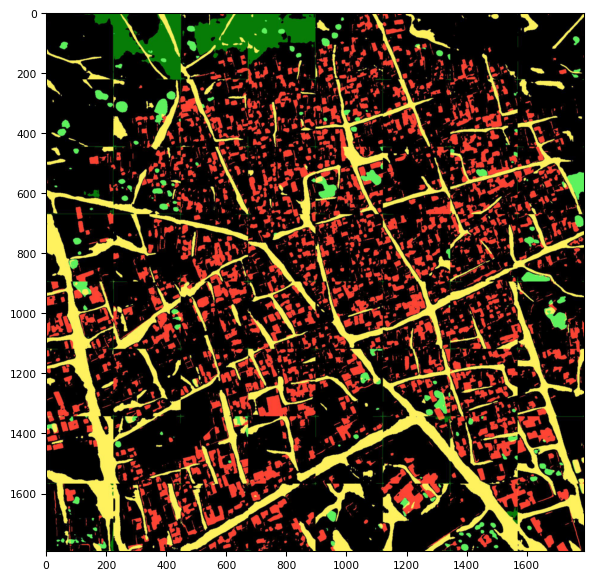

In [12]:
#decoding base64 image and printing output of 1st image
mask1 = BytesIO(base64.b64decode(output['mask1']))
img = Image.open(mask1)
tiff.imshow(np.asarray(img))

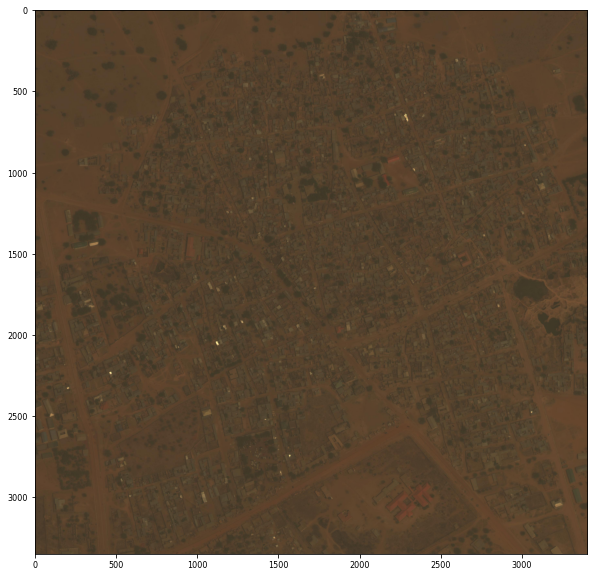

In [16]:
#original 1st image 
temp = plt.imread('./sample/6120_2_2.jpeg')
plt.figure(figsize=(10,10))
plt.imshow(temp)

(<Figure size 988.8x604.8 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x19db6b556d8>)

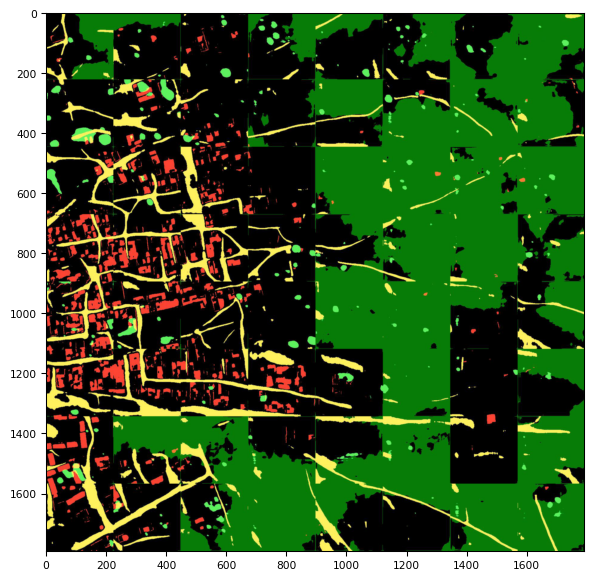

In [17]:
#decoding base64 image and printing output of 2nd image
mask2 = BytesIO(base64.b64decode(output['mask2']))
img = Image.open(mask2)
tiff.imshow(np.asarray(img))

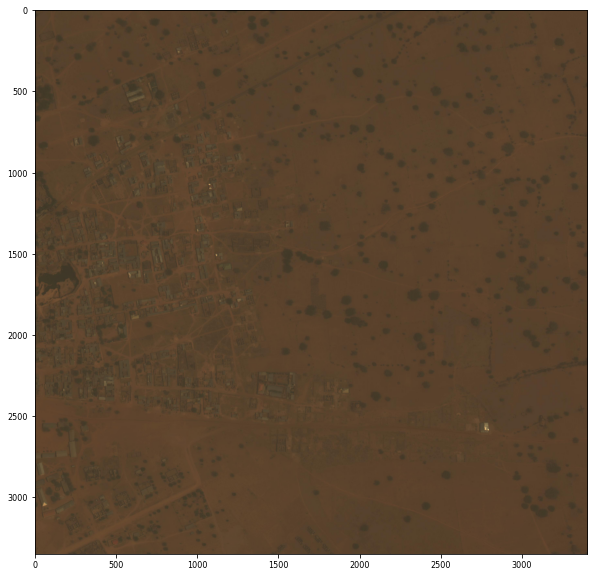

In [18]:
#original 2nd image
temp = plt.imread('./sample/6120_2_3.jpeg')
plt.figure(figsize=(10,10))
plt.imshow(temp)